## Question 5

Is hate or offensive speech with female identifiers perceived differently than hate or offensive speech with male identifiers?

#### Operationalized Question:
Do hateful or offensive comments that include female identifiers have a higher percentage of comments considered controversial or toxic  than hateful or offensive comments that include male identifiers?

#### Hypothesis:
The mean controversiality score for hateful or offensive speech with male identifiers will be closer to 1.00 (more controversial) than the mean controversiality score for hateful or offensive speech with female identifiers. Hateful and offensive speech related to females is more likely to be accepted. Also, some Redditors may not want to engage with the post at all by downvoting, even though the comment may be hidden if it receives enough downvotes. The toxicity scores for comments with female identifiers will be high than those for comments with male identifiers.

#### Results:
The resulting statistics give some insight into the relationship between toxic speech and gender identifiers. Regarding the controversiality scores, we ran Welch’s T-test between the two groups and got the following results (t-statistic=-0.8752, p-value=0.3820). In this case, the p-value for the calculated test statistic is higher than the 5% significance level, leading us to accept the null hypothesis that the means for hateful or offensive Reddit comments with male identifiers are the same as those with female identifiers. This was a surprise to us, and differs from our original hypothesis. In contrast, the p-values for the calculated test statistics of the Detoxify scores are all lower than the 5% significance level, leading us to reject the null hypothesis that there is no difference between the means in each case.


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()

#### Read in the Comments data

In [2]:
c = pd.read_csv('../data/processed/comments.csv')

#### Split the dataframs based on Male/Female identifier classification 

In [3]:
hate_offensive_combined = c[c.davidson_label != 2]
hate_offensive_combined_detox = hate_offensive_combined[['controversiality','gender','toxicity', 'severe_toxicity', 'obscene','identity_attack', 'insult', 'threat', 'sexual_explicit']]
hate_offensive_combined_detox_m = hate_offensive_combined_detox[hate_offensive_combined_detox.gender == 'male']
hate_offensive_combined_detox_f = hate_offensive_combined_detox[hate_offensive_combined_detox.gender == 'female']

#### Controversiality and Toxicity test statistics - Toxic comments with Male vs Female identifiers

We decided on Welch's t-test (aka. Satterwaite test, Smith-Welch-Satterwaite test, Aspin-Welch test, or unequal variances t-test) to test for independent samples, given our unequal sample sizes. After checking for variance equality, we ran the t-test to compare the toxic speech containing female and male identifiers based on the controversiality and Detoxify scores.


In [4]:
def collect_controversiality_and_toxicity_test_statistics(dataset_1, dataset_2, alpha=0.05): 
    ttest_df = pd.DataFrame(columns=['variable','t-statistic','p-value','H0','variance'])
    
    variables = ['controversiality','toxicity', 'severe_toxicity', 'obscene', 'identity_attack', 'insult','threat', 'sexual_explicit']
    ttest_df['variable'] = variables

    for variable in variables:
        ttest_x=dataset_1[variable]
        ttest_y=dataset_2[variable]
        
        if np.var(ttest_x) != np.var(ttest_y):
            ttest_df.loc[ttest_df['variable']==variable,'variance'] = 'unequal'
            ttest = ttest_ind(ttest_x, ttest_y, nan_policy='omit', equal_var=False)
            ttest_df.loc[ttest_df['variable']==variable,'t-statistic'] = ttest[0]
            ttest_df.loc[ttest_df['variable']==variable,'p-value'] = ttest[1]
            if ttest[1] > alpha:
                ttest_df.loc[ttest_df['variable']==variable,'H0'] = 'fail to reject'
            else:
                ttest_df.loc[ttest_df['variable']==variable,'H0'] = 'reject'
        else:
            ttest_df.loc[ttest_df['variable']==variable,'variance'] = 'equal'
            ttest = ttest_ind(ttest_x, ttest_y, nan_policy='omit')
            ttest_df.loc[ttest_df['variable']==variable,'t-statistic'] = ttest[0]
            ttest_df.loc[ttest_df['variable']==variable,'p-value'] = ttest[1]
            if ttest[1] > alpha:
                ttest_df.loc[ttest_df['variable']==variable,'H0'] = 'fail to reject'
            else:
                ttest_df.loc[ttest_df['variable']==variable,'H0'] = 'reject'
    
    return ttest_df

In [5]:
collect_controversiality_and_toxicity_test_statistics(hate_offensive_combined_detox_f,
                                                      hate_offensive_combined_detox_m)

,variable,t-statistic,p-value,H0,variance
0,controversiality,-0.875172,0.381984,fail to reject,unequal
1,toxicity,5.253484,0.0,reject,unequal
2,severe_toxicity,8.927398,0.0,reject,unequal
3,obscene,5.120989,0.0,reject,unequal
4,identity_attack,-3.597479,0.000359,reject,unequal
5,insult,3.123778,0.001907,reject,unequal
6,threat,6.587772,0.0,reject,unequal
7,sexual_explicit,18.883455,0.0,reject,unequal


#### Visualize the mean scores

In this cell, we use Matplotlib and Seaborn to visualize the difference in means between comments with male and female identifiers, including mean controversiality scores and each of the Detoxify metric scores.

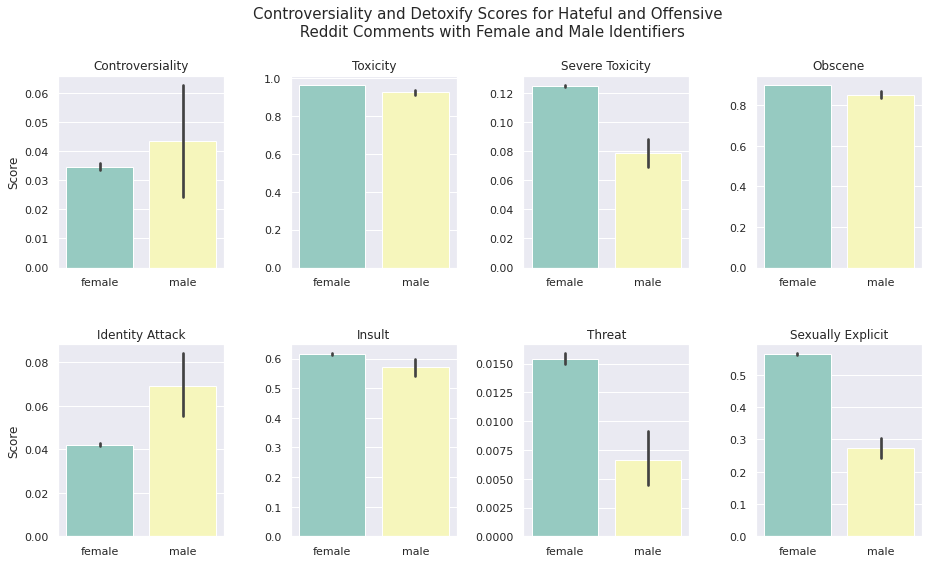

In [6]:
hate_offensive_combined_detox_m_f = hate_offensive_combined_detox[(hate_offensive_combined_detox['gender'] == 'male') | (hate_offensive_combined_detox['gender'] == 'female')]

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle('Controversiality and Detoxify Scores for Hateful and Offensive \n Reddit Comments with Female and Male Identifiers', y=(1.02), size=15)
sns.barplot(ax=axes[0, 0], data=hate_offensive_combined_detox_m_f, x='gender',y='controversiality',palette='Set3').set(xlabel=None,ylabel='Score',title='Controversiality')
sns.barplot(ax=axes[0, 1], data=hate_offensive_combined_detox_m_f, x='gender', y='toxicity',palette='Set3').set(xlabel=None,ylabel=None,title='Toxicity') 
sns.barplot(ax=axes[0, 2], data=hate_offensive_combined_detox_m_f, x='gender', y='severe_toxicity',palette='Set3').set(xlabel=None,ylabel=None,title='Severe Toxicity')
sns.barplot(ax=axes[0, 3], data=hate_offensive_combined_detox_m_f, x='gender', y='obscene',palette='Set3').set(xlabel=None,ylabel=None,title='Obscene')
sns.barplot(ax=axes[1, 0], data=hate_offensive_combined_detox_m_f, x='gender', y='identity_attack',palette='Set3').set(xlabel=None,ylabel='Score',title='Identity Attack')
sns.barplot(ax=axes[1, 1], data=hate_offensive_combined_detox_m_f, x='gender', y='insult',palette='Set3').set(xlabel=None,ylabel=None,title='Insult')
sns.barplot(ax=axes[1, 2], data=hate_offensive_combined_detox_m_f, x='gender', y='threat',palette='Set3').set(xlabel=None,ylabel=None,title='Threat')
sns.barplot(ax=axes[1, 3], data=hate_offensive_combined_detox_m_f, x='gender', y='sexual_explicit',palette='Set3').set(xlabel=None,ylabel=None,title='Sexually Explicit')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

## Question 8

Is hate speech more controversial or toxic than offensive speech?

#### Operationalized Question:
Is the mean controversiality score of hate speech comments higher (closer to 1.0 -- more controversial) than the mean controversiality score of offensive comments? Similarly, are the mean Detoxify scores of hate speech comments higher than the mean Detoxify scores of offensive comments?

#### Hypothesis: 
The mean controversiality score of hate speech comments will not be significantly higher (closer to 1.00 -- more controversial) than the mean controversiality score of offensive comments. The challenge of separating hate speech and offensive speech means that Redditors will not respond to them significantly differently.

#### Results:
The p-values for the calculated test statistics for both controversiality and Detoxify scores are lower than the 5% significance level, leading us to reject the null hypothesis that the means for hateful Reddit comments are the same as offensive ones. In terms of controversiality, the result differs from our hypothesis, as we assumed that both types of comments would be considered similarly controversial. There does appear to be a relationship between controversiality and a comment's classification as either hateful or offensive. 


#### Create Separate Dataframes for Hate and Offensive Comments

In [7]:
hate_df = c[c.davidson_label == 0]
offensive_df = c[c.davidson_label == 1]

#### Controversiality and Toxicity test statistics - Hate vs Offensive comments
Using the same function as above, we again use Welch's t-test (aka. Satterwaite test, Smith-Welch-Satterwaite test, Aspin-Welch test, or unequal variances t-test) to test for independent samples, given our unequal sample sizes. After checking for variance equality, we ran the t-test to compare hate comments and offensive comments based on the controversiality and Detoxify scores.


In [8]:
collect_controversiality_and_toxicity_test_statistics(hate_df, offensive_df)

,variable,t-statistic,p-value,H0,variance
0,controversiality,5.91146,0.0,reject,unequal
1,toxicity,42.025666,0.0,reject,unequal
2,severe_toxicity,77.545758,0.0,reject,unequal
3,obscene,40.780079,0.0,reject,unequal
4,identity_attack,59.001038,0.0,reject,unequal
5,insult,119.493498,0.0,reject,unequal
6,threat,20.798912,0.0,reject,unequal
7,sexual_explicit,-51.444352,0.0,reject,unequal


#### Visualize the mean scores

In this cell, we use Matplotlib and Seaborn to visualize the difference in means between hate and offensive comments, including mean controversiality scores and each of the Detoxify metric scores.

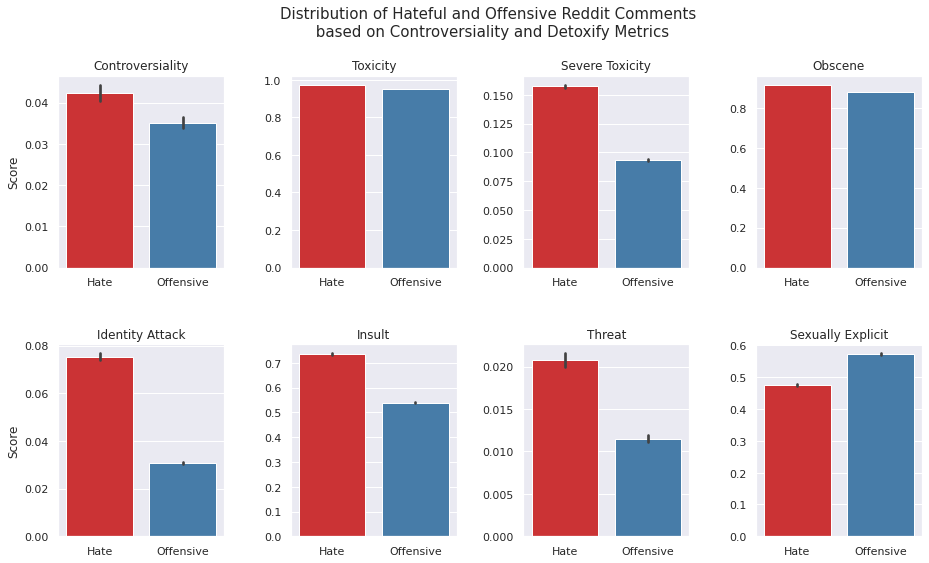

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle('Distribution of Hateful and Offensive Reddit Comments \n based on Controversiality and Detoxify Metrics', y=(1.02), size=15)
sns.barplot(ax=axes[0, 0], data=hate_offensive_combined, x='davidson_label', y='controversiality',palette='Set1').set(xticklabels=['Hate', 'Offensive'], xlabel=None,ylabel='Score',title='Controversiality')
sns.barplot(ax=axes[0, 1], data=hate_offensive_combined, x='davidson_label', y='toxicity',palette='Set1').set(xticklabels=['Hate', 'Offensive'],xlabel=None,ylabel=None,title='Toxicity')
sns.barplot(ax=axes[0, 2], data=hate_offensive_combined, x='davidson_label', y='severe_toxicity',palette='Set1').set(xticklabels=['Hate', 'Offensive'],xlabel=None,ylabel=None,title='Severe Toxicity')
sns.barplot(ax=axes[0, 3], data=hate_offensive_combined, x='davidson_label', y='obscene',palette='Set1').set(xticklabels=['Hate', 'Offensive'],xlabel=None,ylabel=None,title='Obscene')
sns.barplot(ax=axes[1, 0], data=hate_offensive_combined, x='davidson_label', y='identity_attack',palette='Set1').set(xticklabels=['Hate', 'Offensive'],xlabel=None,ylabel='Score',title='Identity Attack')
sns.barplot(ax=axes[1, 1], data=hate_offensive_combined, x='davidson_label', y='insult',palette='Set1').set(xticklabels=['Hate', 'Offensive'],xlabel=None,ylabel=None,title='Insult')
sns.barplot(ax=axes[1, 2], data=hate_offensive_combined, x='davidson_label', y='threat',palette='Set1').set(xticklabels=['Hate', 'Offensive'],xlabel=None,ylabel=None,title='Threat')
sns.barplot(ax=axes[1, 3], data=hate_offensive_combined, x='davidson_label', y='sexual_explicit',palette='Set1').set(xticklabels=['Hate', 'Offensive'],xlabel=None,ylabel=None,title='Sexually Explicit')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

## Question 9

Is toxic speech more controversial than speech that is neither hateful or offensive?

#### Operationalized Question:
Is the mean controversiality score of toxic comments higher (closer to 1.0 -- more controversial) than the mean controversiality score of non-toxic comments? Similarly, are the mean Detoxify scores of toxic comments higher than the mean Detoxify scores of non-toxic comments?

#### Hypothesis:
The mean controversiality and Detoxify scores of toxic language will be significantly higher (closer to 1.00 -- more controversial) than the mean controversiality and Detoxify scores of non-toxic comments.

#### Results:
In line with our hypothesis, the p-values for the calculated test statistics for both controversiality and Detoxify scores are lower than the 5% significance level, leading us to reject the null hypothesis that the means for toxic Reddit comments (classified as having both hate and offensive speech) are the same as non-toxic comments (classified as having neither hate nor offensive speech).


#### Create a new dataframe for non-toxic comments

In [10]:
neither_df = c[c.davidson_label == 2]

#### Controversiality and Toxicity test statistics - Toxic vs non-toxic comments
Using the same function as above, we use Welch's t-test (aka. Satterwaite test, Smith-Welch-Satterwaite test, Aspin-Welch test, or unequal variances t-test) to test for independent samples, given our unequal sample sizes. After checking for variance equality, we ran the t-test to compare toxic comments and non-toxic comments based on the controversiality and Detoxify scores.


In [11]:
collect_controversiality_and_toxicity_test_statistics(hate_offensive_combined, neither_df)

,variable,t-statistic,p-value,H0,variance
0,controversiality,23.24974,0.0,reject,unequal
1,toxicity,136.449375,0.0,reject,unequal
2,severe_toxicity,147.589107,0.0,reject,unequal
3,obscene,149.213238,0.0,reject,unequal
4,identity_attack,42.370351,0.0,reject,unequal
5,insult,52.454582,0.0,reject,unequal
6,threat,34.069658,0.0,reject,unequal
7,sexual_explicit,132.081328,0.0,reject,unequal


#### Visualize the mean scores

In this cell, we use Matplotlib and Seaborn to visualize the difference in means between toxic and non-toxic comments, including mean controversiality scores and each of the Detoxify metric scores.

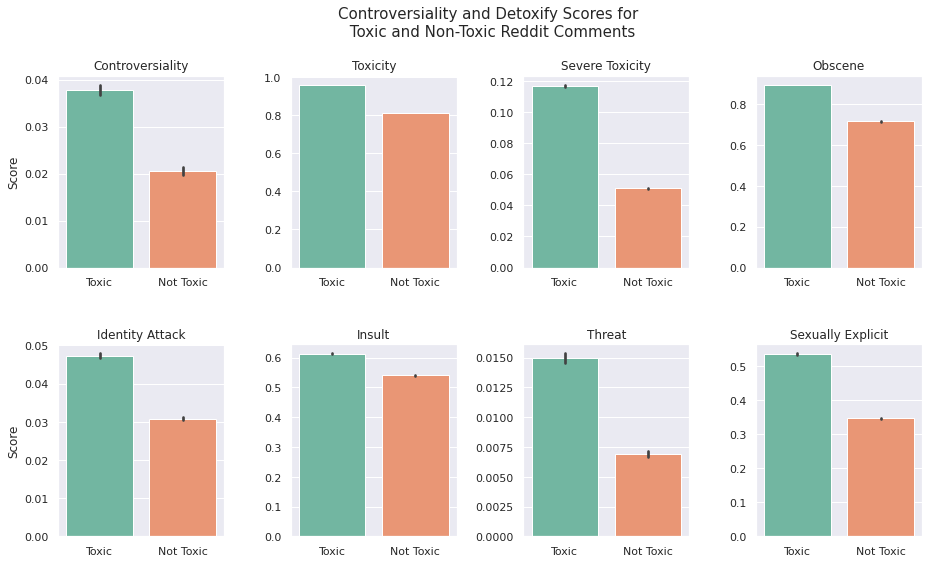

In [14]:
toxic_v_non_toxic = c[['davidson_label','controversiality', 'gender', 'toxicity', 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat', 'sexual_explicit']].copy()
toxic_v_non_toxic.loc[(toxic_v_non_toxic['davidson_label'] == 0)|(toxic_v_non_toxic['davidson_label'] == 1), 'label_group'] = 'Toxic'
toxic_v_non_toxic.loc[toxic_v_non_toxic['davidson_label'] == 2, 'label_group'] = 'Not Toxic'

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle('Controversiality and Detoxify Scores for \n Toxic and Non-Toxic Reddit Comments',y=(1.02), size=15)
sns.barplot(ax=axes[0, 0], data=toxic_v_non_toxic, x='label_group', y='controversiality',palette='Set2').set(xlabel=None,ylabel='Score',title='Controversiality')
sns.barplot(ax=axes[0, 1], data=toxic_v_non_toxic, x='label_group', y='toxicity',palette='Set2').set(xlabel=None,ylabel=None,title='Toxicity')
sns.barplot(ax=axes[0, 2], data=toxic_v_non_toxic, x='label_group', y='severe_toxicity',palette='Set2').set(xlabel=None,ylabel=None,title='Severe Toxicity')
sns.barplot(ax=axes[0, 3], data=toxic_v_non_toxic, x='label_group', y='obscene',palette='Set2').set(xlabel=None,ylabel=None,title='Obscene')
sns.barplot(ax=axes[1, 0], data=toxic_v_non_toxic, x='label_group', y='identity_attack',palette='Set2').set(xlabel=None,ylabel='Score',title='Identity Attack')
sns.barplot(ax=axes[1, 1], data=toxic_v_non_toxic, x='label_group', y='insult',palette='Set2').set(xlabel=None,ylabel=None,title='Insult')
sns.barplot(ax=axes[1, 2], data=toxic_v_non_toxic, x='label_group', y='threat',palette='Set2').set(xlabel=None,ylabel=None,title='Threat')
sns.barplot(ax=axes[1, 3], data=toxic_v_non_toxic, x='label_group', y='sexual_explicit',palette='Set2').set(xlabel=None,ylabel=None,title='Sexually Explicit')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b22dad3f-c925-4cd0-bb81-e22d83bd774f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>